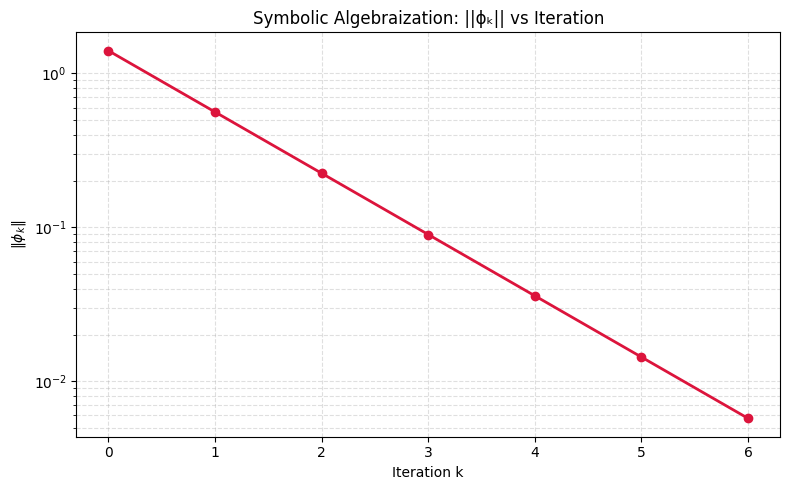

Final ωₖ:
[ 1.0032768  0.9975424  0.0036864 -0.0016384]


,c1,c2,c3,c4,||ϕₖ||
0,1.800000,0.400000,0.900000,-0.400000,1.403567
1,1.320000,0.760000,0.360000,-0.160000,0.561427
2,1.128000,0.904000,0.144000,-0.064000,0.224571
3,1.051200,0.961600,0.057600,-0.025600,0.089828
4,1.020480,0.984640,0.023040,-0.010240,0.035931
5,1.008192,0.993856,0.009216,-0.004096,0.014373
6,1.003277,0.997542,0.003686,-0.001638,0.005749


In [4]:
# symbolic_iteration_engine.ipynb

"""
General Symbolic Algebraization Engine
This notebook lets you input any initial class ω₀ = ω_alg + ϕ₀ and iterate Ŝ with custom parameters.
"""

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code")

from visualization_tools import plot_phi_decay

### --- INPUT --- ###

# Define the algebraic part ω_alg and transcendental part ϕ₀ manually here:
omega_alg = np.array([1.0, 1.0, 0.0, 0.0])  # e.g., D1∧D2 + D3∧D4
phi0 = np.array([0.8, -0.6, 0.9, -0.4])      # symbolic transcendental component

# Iteration parameters
num_iterations = 7
decay_factor = 0.4

### --- SYMBOLIC ITERATION --- ###
omega_sequence = []
phi_sequence = []
phi_norms = []

for k in range(num_iterations):
    phi_k = decay_factor**k * phi0
    omega_k = omega_alg + phi_k
    phi_norms.append(np.linalg.norm(phi_k))
    omega_sequence.append(omega_k.copy())
    phi_sequence.append(phi_k.copy())

### --- OUTPUT --- ###

plot_phi_decay(phi_norms, title="Symbolic Algebraization: ||ϕₖ|| vs Iteration")

# Optional: Show the final ωₖ and convergence report
print("Final ωₖ:")
print(omega_sequence[-1])

import pandas as pd
num_components = len(omega_sequence[0])
df = pd.DataFrame(omega_sequence, columns=[f"c{i+1}" for i in range(num_components)])
df["||ϕₖ||"] = phi_norms

df
